In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_excel('MATCHES_clean.xlsx')
df.head()

,Season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,IPL-2017,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium
1,IPL-2017,06-04-2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,IPL-2017,07-04-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,IPL-2017,08-04-2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium
4,IPL-2017,08-04-2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium


In [5]:
df.shape

(752, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season           752 non-null    object
 1   date             752 non-null    object
 2   team1            752 non-null    object
 3   team2            752 non-null    object
 4   toss_winner      752 non-null    object
 5   toss_decision    752 non-null    object
 6   result           752 non-null    object
 7   dl_applied       752 non-null    int64 
 8   winner           752 non-null    object
 9   win_by_runs      752 non-null    int64 
 10  win_by_wickets   752 non-null    int64 
 11  player_of_match  752 non-null    object
 12  venue            752 non-null    object
dtypes: int64(3), object(10)
memory usage: 76.5+ KB


## Visualization

## 1. Number of matches played per season

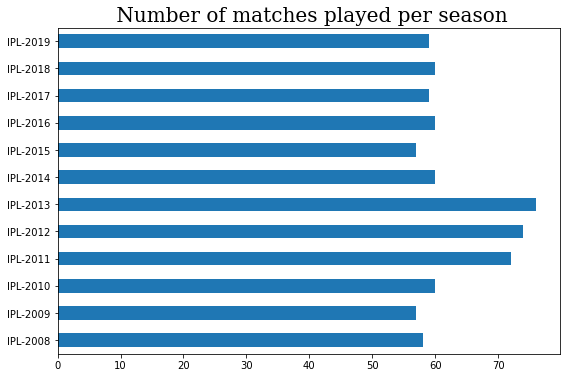

In [7]:
plt.figure(figsize=(7,5))
df['Season'].value_counts().sort_index().plot(kind='barh',figsize=(9,6))
plt.title(' Number of matches played per season',fontdict={'family':'serif','size':20});

### Observations:
Most number of matches has been played in the season 2013

## 2. Number of winns across teams

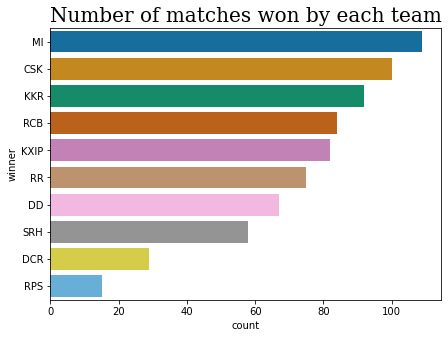

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(y=df['winner'],order=df['winner'].value_counts().index[0:10],palette='colorblind')
plt.title('Number of matches won by each team',fontdict={'family':'serif','size':20});

### Observations:
MI has won the maximum number of matches

## 3. Top 10 Player of the match

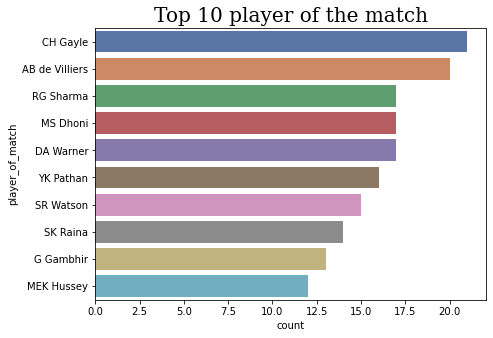

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(y=df['player_of_match'],order=df['player_of_match'].value_counts().index[0:10],
              palette='deep')
plt.title('Top 10 player of the match',fontdict={'family':'serif','size':20});

### Observations:
Chris Gayles has been named player of the match for maximum number of times

## 4. Top 10 venues where maximum matches has been played

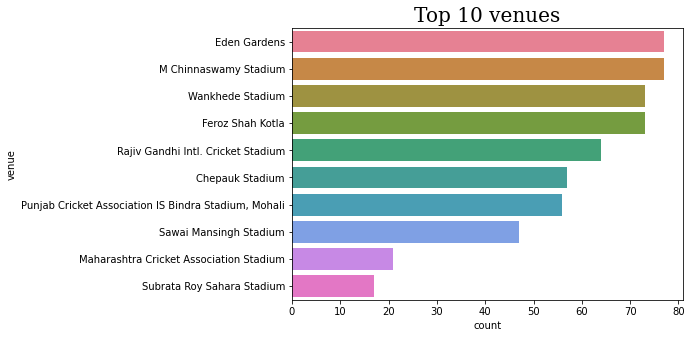

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(y=df['venue'],order=df['venue'].value_counts().index[0:10],palette='husl')
plt.title('Top 10 venues',fontdict={'family':'serif','size':20});

### Observations:
Eaden Gardens and Chinnaswamy are the top two venues.

## 5. Toss decision

In [11]:
df1=df.copy()
df1['winner_cate']=np.where(df1['toss_winner']==df1['winner'],1,0)
df_toss=df1.groupby(['toss_decision','winner_cate']).size().reset_index().rename(columns={0:'count'})
df_toss.head()

,toss_decision,winner_cate,count
0,bat,0,158
1,bat,1,134
2,field,0,201
3,field,1,259


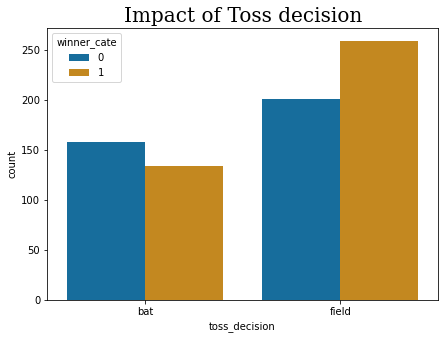

In [12]:
plt.figure(figsize=(7,5),edgecolor='y')
sns.barplot(x='toss_decision',y='count',hue='winner_cate',data=df_toss,palette='colorblind')
plt.title('Impact of Toss decision',fontdict={'family':'serif','size':20});

## Observation:
1. We can clearly see that Fielding first was the most favourable choice for the teams.
2. Those who  fielded first won more than those who opted for bat first.
#### Both observations states that fielding first has some effect in increasing the chances of winning the game.

## 6. Team that won chasing maximum times

In [13]:
df.loc[(df['win_by_runs']==0)]['winner'].value_counts()

KKR     56
MI      52
RCB     49
RR      48
CSK     48
KXIP    44
DD      42
SRH     28
GL      12
DCR     11
RPS      8
DC       7
PW       6
KTK      4
Name: winner, dtype: int64

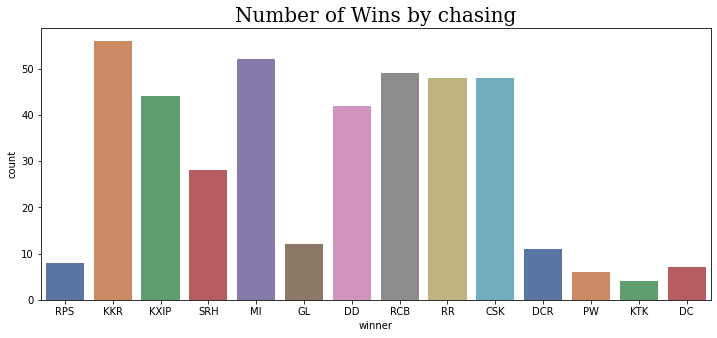

In [14]:
# plotting the countplot
plt.figure(figsize=(12,5),edgecolor='y')
sns.countplot(x=df.loc[(df['win_by_runs']==0)]['winner'],palette='deep')
plt.title('Number of Wins by chasing',fontdict={'family':'serif','size':20});

### Observations:
#### KKR has won the maximum times chasing the game.

## 7. win by runs violin plot

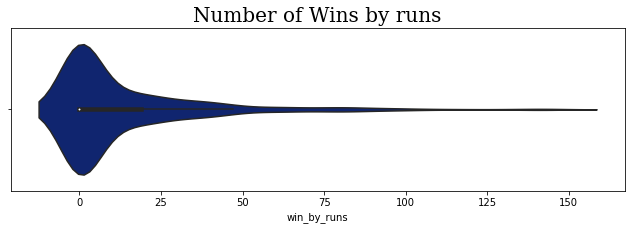

In [15]:
plt.figure(figsize=(11,3))
sns.violinplot(x='win_by_runs',data=df,palette='dark')
plt.title('Number of Wins by runs',fontdict={'family':'serif','size':20});

## 8. Number of wins by wicket

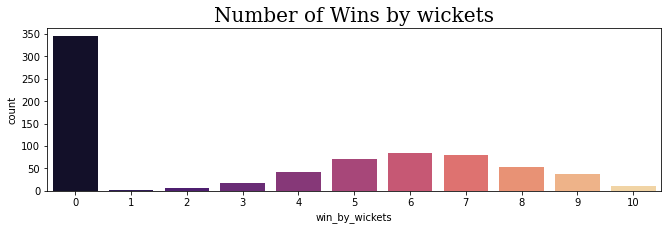

In [16]:
plt.figure(figsize=(11,3))
sns.countplot(x='win_by_wickets',data=df,palette='magma')
plt.title('Number of Wins by wickets',fontdict={'family':'serif','size':20});

### Observations:
1. Winning by 0 wickets means winning by defending or win by batting first.

### 9. Double headers
#### Note : a double header means that on one particular day two matches were played. and we are counting both the matches as double headers. so for example if on one particulat day it was saturday and two matches were played then our count will be two. not one as both are double header for one another

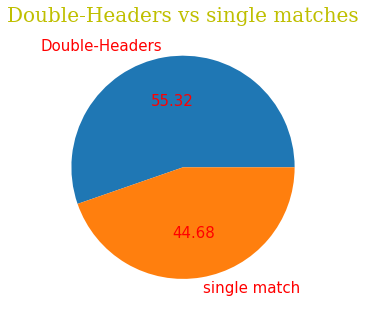

In [17]:
'''for getting double headers we have to find duplicates in the date feature which will give us a True
or false result for every date, then by selecting only the True ones we will get the double header'''
plt.figure(figsize=(5,10))
plt.pie(df.date.duplicated(keep=False).value_counts(),labels=['Double-Headers','single match']
        ,autopct='%1.2f',textprops={'color':'r','size':15})
plt.title('Double-Headers vs single matches',fontdict={'family':'serif','color':'y','size':20});

### Observations:
1. More than 50% matches were Double-Header, i.e they took place on weekends

## Double-headers per season

In [18]:
df_dh=df.copy()
df_dh['date_dupli']= df.date.duplicated(keep=False).astype(object)
df_dh.head(3)

,Season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,date_dupli
0,IPL-2017,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,False
1,IPL-2017,06-04-2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,False
2,IPL-2017,07-04-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,False


In [19]:
df_dh.groupby(['date_dupli'])['Season'].value_counts()[1]

Season
IPL-2013    50
IPL-2011    46
IPL-2012    46
IPL-2009    40
IPL-2014    38
IPL-2010    34
IPL-2017    32
IPL-2008    30
IPL-2015    28
IPL-2016    24
IPL-2018    24
IPL-2019    24
Name: Season, dtype: int64

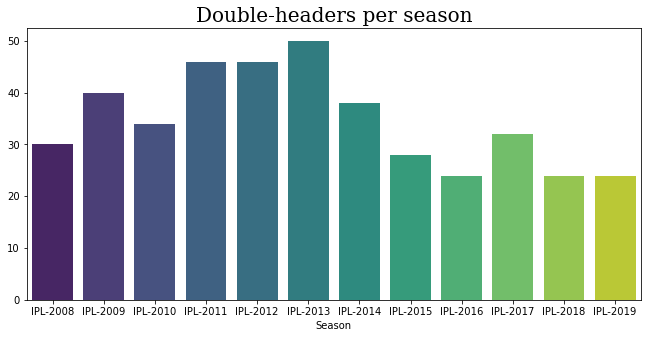

In [20]:
plt.figure(figsize=(11,5))
sns.barplot(x=df_dh.groupby(['date_dupli'])['Season'].value_counts()[1].sort_index().index,
            y=df_dh.groupby(['date_dupli'])['Season'].value_counts()[1].sort_index().values,
            palette='viridis')
plt.title('Double-headers per season',fontdict={'family':'serif','color':'k','size':20});

### 10. Team won more than 10 matches on a particular ground 

In [21]:
df.groupby(['winner','venue'])[['winner','venue']].value_counts().sort_values(ascending=False).head(8)

winner  venue                                               
KKR     Eden Gardens                                            45
MI      Wankhede Stadium                                        42
CSK     Chepauk Stadium                                         40
RCB     M Chinnaswamy Stadium                                   37
RR      Sawai Mansingh Stadium                                  32
SRH     Rajiv Gandhi Intl. Cricket Stadium                      30
KXIP    Punjab Cricket Association IS Bindra Stadium, Mohali    30
DD      Feroz Shah Kotla                                        27
dtype: int64

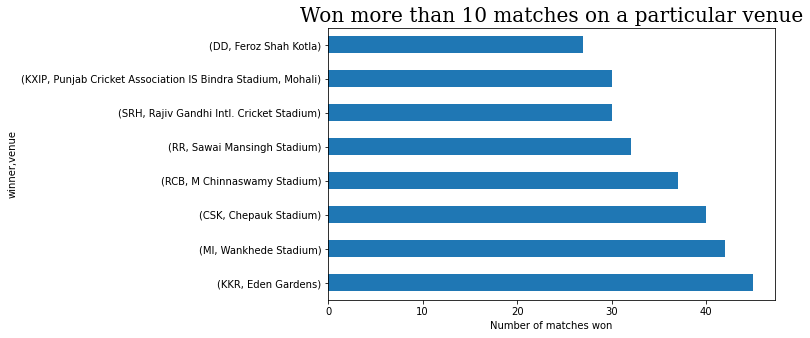

In [22]:
plt.figure(figsize=(8,5))
df.groupby(['winner','venue'])[['winner','venue']].value_counts().sort_values(ascending=False)[:8].plot(kind='barh')
plt.title('Won more than 10 matches on a particular venue',
          fontdict={'family':'serif','color':'k','size':20})
plt.xlabel('Number of matches won');

#### 11. Top chassing grounds:

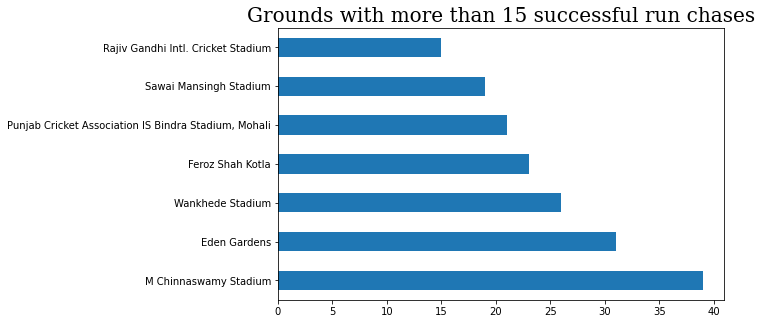

In [23]:
plt.figure(figsize=(8,5))
df.loc[(df['toss_winner']==df['winner']) & (df['toss_decision']=='field')]['venue'].value_counts()[:7].plot(kind='barh')
plt.title('Grounds with more than 15 successful run chases',
          fontdict={'family':'serif','color':'k','size':20});

## 12. Grounds favourable for defending totals

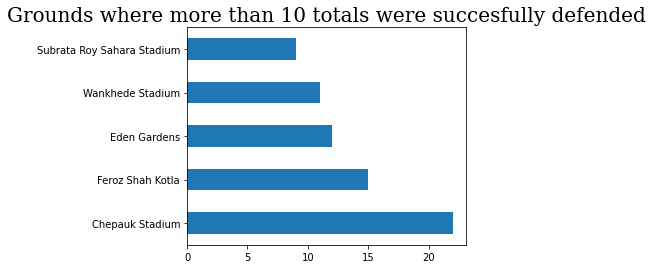

In [24]:
plt.figure(figsize=(5,4))
df.loc[(df['toss_winner']==df['winner']) & (df['toss_decision']=='bat')]['venue'].value_counts()[:5].plot(kind='barh')
plt.title('Grounds where more than 10 totals were succesfully defended',
          fontdict={'family':'serif','color':'k','size':20});